In [1]:

import pandas as pd
%pprint

Pretty printing has been turned OFF


In [2]:

speedtest_log_df = pd.read_csv('../data/csv/speedtest_log.csv')
speedtest_log_df['Timestamp'] = pd.to_datetime(speedtest_log_df['Timestamp'], errors='coerce')

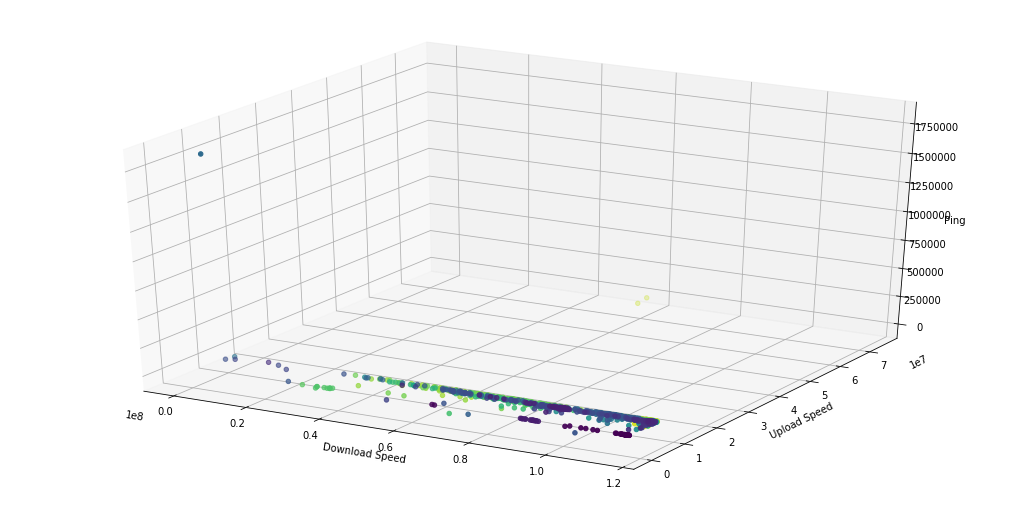

In [3]:

%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

xdata = speedtest_log_df['Download'].values
ydata = speedtest_log_df['Upload'].values
zdata = speedtest_log_df['Ping'].values
tdata = speedtest_log_df['Timestamp'].values

fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection='3d')

path_3d_collection = ax.scatter3D(xdata, ydata, zdata, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Download Speed')
ylabel_text = plt.ylabel('Upload Speed')
zlabel_text = ax.set_zlabel('Ping')

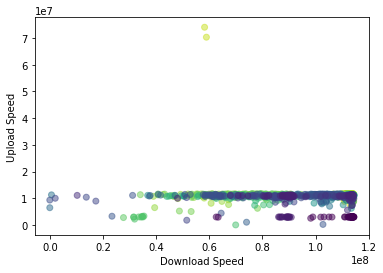

In [4]:

path_collection = plt.scatter(xdata, ydata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Download Speed')
ylabel_text = plt.ylabel('Upload Speed')

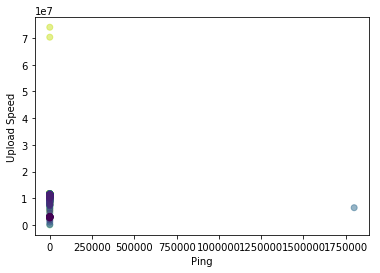

In [5]:

path_collection = plt.scatter(zdata, ydata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Ping')
ylabel_text = plt.ylabel('Upload Speed')

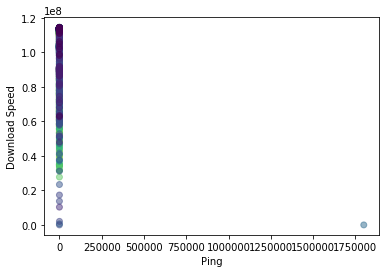

In [6]:

path_collection = plt.scatter(zdata, xdata, alpha=0.5, c=tdata, cmap='viridis_r')
xlabel_text = plt.xlabel('Ping')
ylabel_text = plt.ylabel('Download Speed')

In [7]:

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot_time_series(x, y, x_label, y_label):
    fig = plt.figure(figsize=(18, 9))
    ax = plt.axes()

    months = mdates.MonthLocator()
    months_format = mdates.DateFormatter('%B')
    days = mdates.DayLocator()
    days_format = mdates.DateFormatter('%m/%d')

    # Format the ticks
    ax.xaxis_date()
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_format)
    
    path_collection = ax.plot_date(x, y)
    xlabel_text = plt.xlabel(x_label)
    ylabel_text = plt.ylabel(y_label)

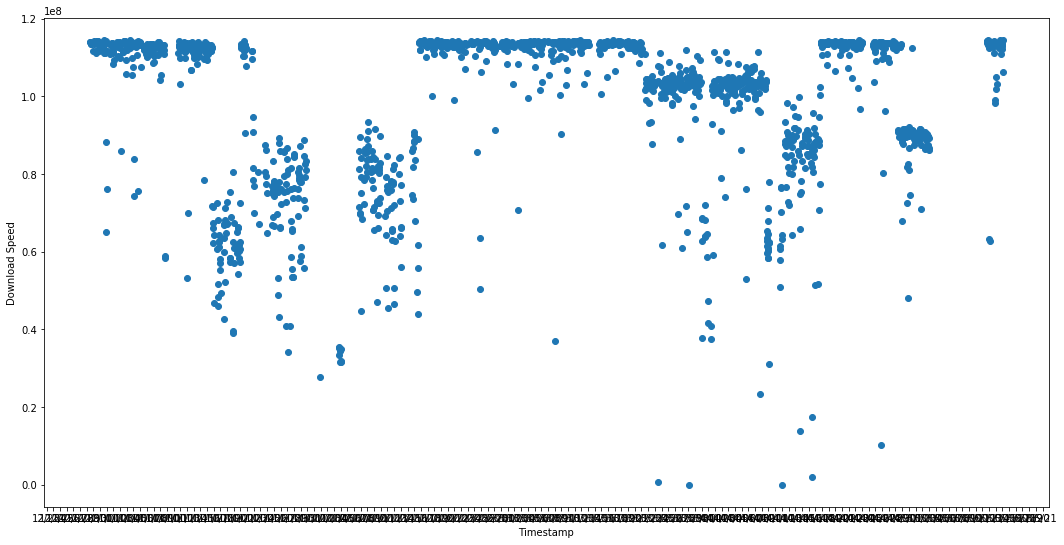

In [9]:

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plot_time_series(tdata, xdata, 'Timestamp', 'Download Speed')

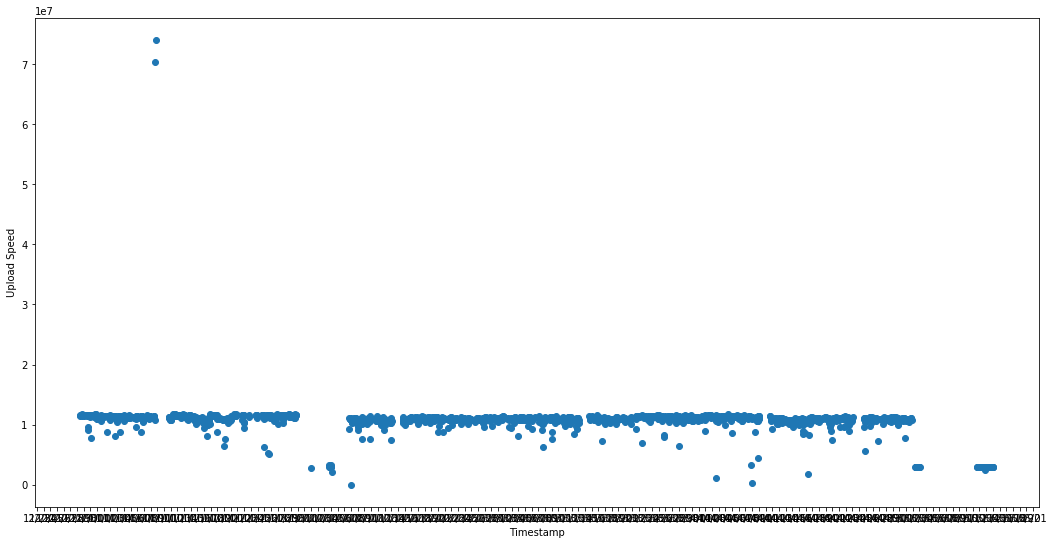

In [10]:

plot_time_series(tdata, ydata, 'Timestamp', 'Upload Speed')

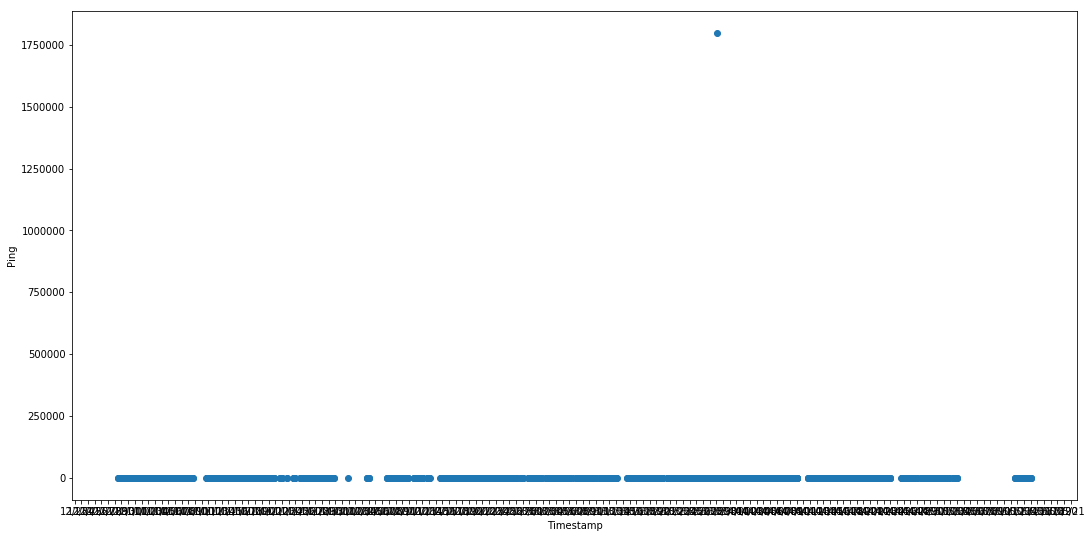

In [11]:

plot_time_series(tdata, zdata, 'Timestamp', 'Ping')

In [12]:

for column_name in ['Server ID', 'Sponsor', 'Server Name', 'Distance', 'IP Address']:
    column_series = speedtest_log_df[column_name]
    print()
    print(column_name)
    print(column_series.value_counts())


Server ID
2405     1228
4920      258
5960       32
13429      26
1774       13
4981       11
16614       9
22780       5
5288        4
10170       1
Name: Server ID, dtype: int64

Sponsor
Spectrum                   1228
Norwood Light Broadband     258
netBlazr                     32
Starry, Inc.                 26
Comcast                      13
SELCO                        11
Cox - New England             9
Bluespan                      5
Bluespan Wireless, LLC        4
CenturyLink, Inc              1
Name: Sponsor, dtype: int64

Server Name
Oxford, MA        1228
Norwood, MA        258
Boston, MA          39
Somerville, MA      32
Shrewsbury, MA      11
Providence, RI       9
Sahuarita, AZ        5
Tucson, AZ           5
Name: Server Name, dtype: int64

Distance
61.546479    1025
50.722228     226
60.187778     203
60.565544      39
52.596780      31
57.809151      29
61.440858       9
10.936825       7
46.095159       5
18.421404       5
62.348745       2
20.470829       2
9.52401